## BoomBike Multiple Linear Regression Model 

### Problem Statement:

BoomBikes aims to identify the key factors influencing the demand for shared bikes in the American market post-COVID-19 lockdown. They seek to understand which variables significantly predict bike demand and how well these variables describe the demand to develop a strategic business plan for recovery and growth.

### Business Goal / Objective: 

Model shared bike demand using available variables to help management understand and strategize based on demand dynamics.

### Approach High Level Steps

1. Data Loading 
2. Data Understanding and Analysis 
3. Data Cleaning and Outliers Treatment if required. 
4. Visualisation of Categorical and Numeric Variables choosing right plots (Box Plots and Scatter Plot) 
5. Derived Metrics/Dummy Variables/Encoding Variables 
5. Correlation / Multicolinearity detections. 

## Data Dictionary Fields 
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users

#### Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
#Machine learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [5]:
# Importing day.csv - BoomBikes Data 
boomBikes = pd.read_csv('day.csv')

In [6]:
#Always check shape to understand size of the data. 
boomBikes.shape

(730, 16)

In [7]:
#Taking look at the first 5 rows to understand data structure and format. 
boomBikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
#Let's check dtype and nonnull count. 
boomBikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
(boomBikes.isnull().sum()/len(boomBikes)*100).sort_values(ascending=False)


instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

We can see missing treatment is not required. Also, Data types are looks fine except dteday it can be converted into date. 

In [10]:
#Let's convert dteday to date 

#Option - 1 
# from datetime import datetime
# boomBikes['dteday'] = boomBikes['dteday'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))

#Option - 2
#Found the better way within pandas. 
boomBikes['dteday'] = pd.to_datetime(boomBikes['dteday'], format='%d-%m-%Y')

In [11]:
boomBikes.dteday.dtype

dtype('<M8[ns]')

In [12]:
#While working on this field, let's create derived metrics, Month and Year Column can be extracted. 
#boomBikes['year'] = boomBikes['dteday'].dt.year  #yr column already given. 
boomBikes['month'] = boomBikes['dteday'].dt.month

In [13]:
#Let's quick check and verify before dropping date. 
boomBikes.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1


In [14]:
#Let's drop dteday column now. 
# Also We can drop "mnth" as we have created new columns already. 
# Also, We can see holiday is already covered in Workinday so it can also be removed. 
# Also, Additionally we can see cnt is containing in casual and registered so, these 2 can be removed. 
# Also, instant is also not required. We don't require in this model to know instant. 
boomBikes.drop(['dteday','mnth','holiday','casual','registered','instant'], axis=1, inplace=True)

In [15]:
boomBikes.head(3)

,season,yr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,month
0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1


In [16]:
#Let's check unique values count in each columns. 
boomBikes.nunique().sort_values()

yr              2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
hum           594
windspeed     649
atemp         689
cnt           695
dtype: int64

In [17]:
#Let's give better name to some columns. 
boomBikes.rename(columns={'hum':'humidity','cnt':'count','yr':'year'}, inplace=True)

In [18]:
boomBikes.head(1)

,season,year,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,month
0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1


#### Mapping with Meaningful Names

In [19]:

#Let's Convert season into Categorical features. 
boomBikes['season'] = boomBikes['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

#Let's weathersit into respective columns. Encoding.
boomBikes['weathersit'] = boomBikes['weathersit'].map( {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'})

#Now, Let's check workingday column. 
boomBikes['workingday'] = boomBikes['workingday'].map({1:'working_day',0:'Holiday'})

#Let's convert months as well. 
boomBikes['month'] = boomBikes['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

#Now, Let's do it for Weekday. 
boomBikes['weekday'] = boomBikes['weekday'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})


In [20]:
boomBikes.head(5)

,season,year,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,month
0,spring,0,Sun,Holiday,Mist,14.110847,18.18125,80.5833,10.749882,985,Jan
1,spring,0,Mon,Holiday,Mist,14.902598,17.68695,69.6087,16.652113,801,Jan
2,spring,0,Tue,working_day,Clear,8.050924,9.47025,43.7273,16.636703,1349,Jan
3,spring,0,Wed,working_day,Clear,8.200000,10.60610,59.0435,10.739832,1562,Jan
4,spring,0,Thu,working_day,Clear,9.305237,11.46350,43.6957,12.522300,1600,Jan


### Step 2: Data Visualisation

#### Univariate Analysis With Visuals.

In [21]:
#Function to display count in graph.
def display_count_on_the_bar(ax):
    # Display count values on top of each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha = 'center',
            va = 'center',
            xytext = (0, 9),
            textcoords = 'offset points',rotation = 90)

In [22]:
plt.figure(figsize=(10, 6), dpi=300)
sns.set(style="whitegrid")

<Figure size 3000x1800 with 0 Axes>

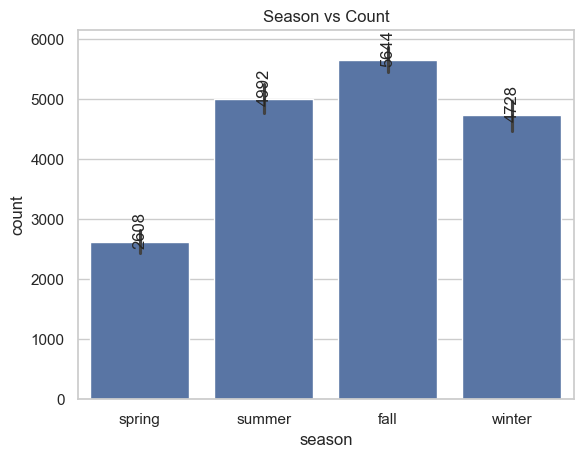

In [23]:
ax = sns.barplot(x='season', y='count', data=boomBikes)
display_count_on_the_bar(ax)
plt.title('Season vs Count')
plt.show()

In Fall ( Monsoon) Bike Rentals are generally high.

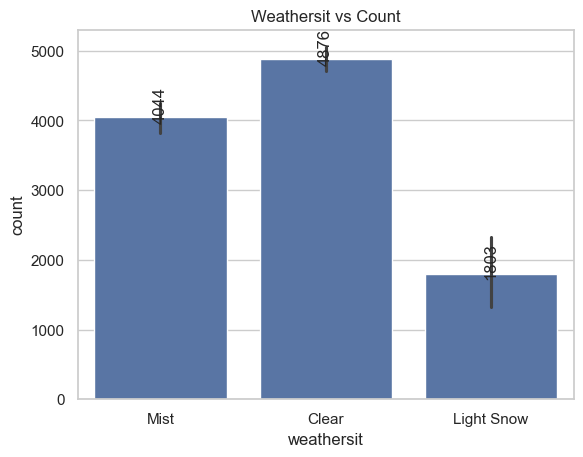

In [24]:
#Let's Plot the weathersit
ax= sns.barplot(x='weathersit', y='count',data=boomBikes)
display_count_on_the_bar(ax)
plt.title('Weathersit vs Count')
plt.show()

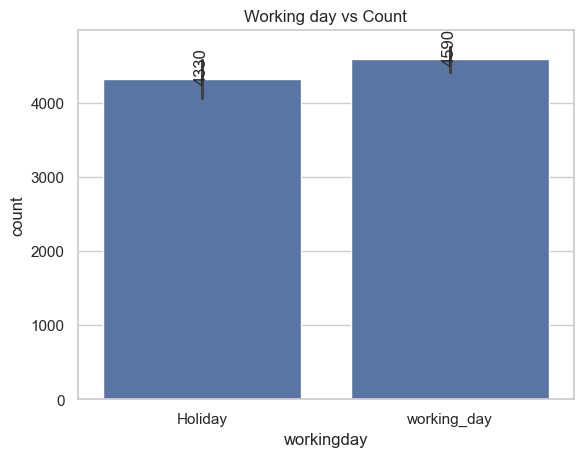

In [25]:
ax=sns.barplot(x='workingday', y='count', data=boomBikes)
display_count_on_the_bar(ax)
plt.title('Working day vs Count')
plt.show()

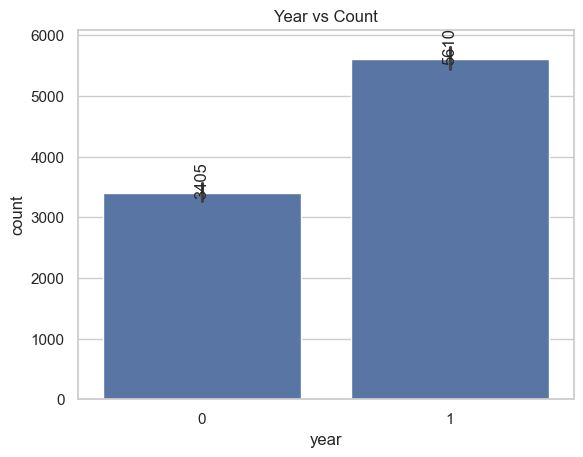

In [26]:
#Display Year Data. 
ax=sns.barplot(x='year', y='count', data=boomBikes)
display_count_on_the_bar(ax)
plt.title('Year vs Count')
plt.show()

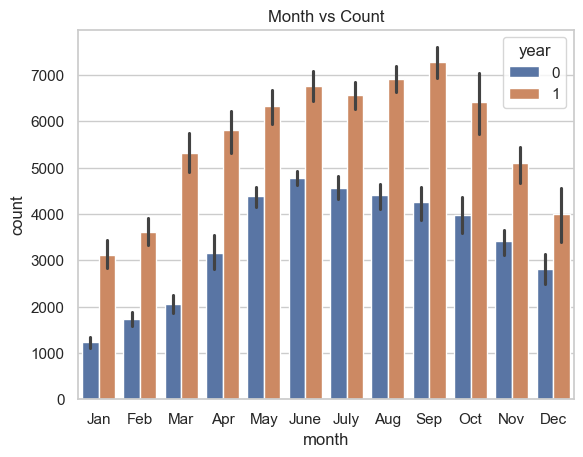

In [27]:
ax=sns.barplot(x='month', y='count', hue='year' ,data=boomBikes)
plt.title('Month vs Count')
plt.show()

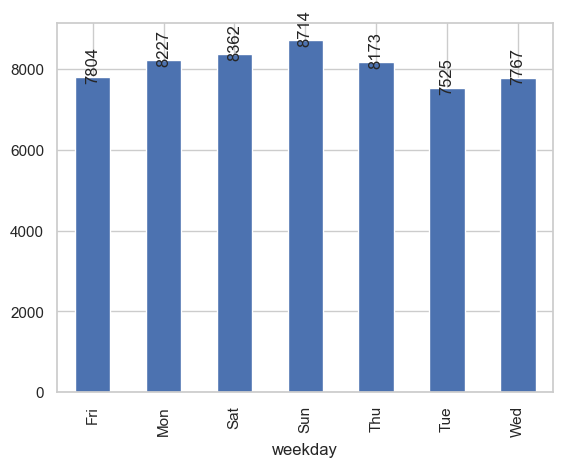

In [28]:
ax=boomBikes.groupby('weekday')['count'].max().plot(kind='bar')
display_count_on_the_bar(ax)
plt.show()

Bike Rentals are happening more on Sunday, Saturday. 

In [29]:
boomBikes.columns

Index(['season', 'year', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'humidity', 'windspeed', 'count', 'month'],
      dtype='object')

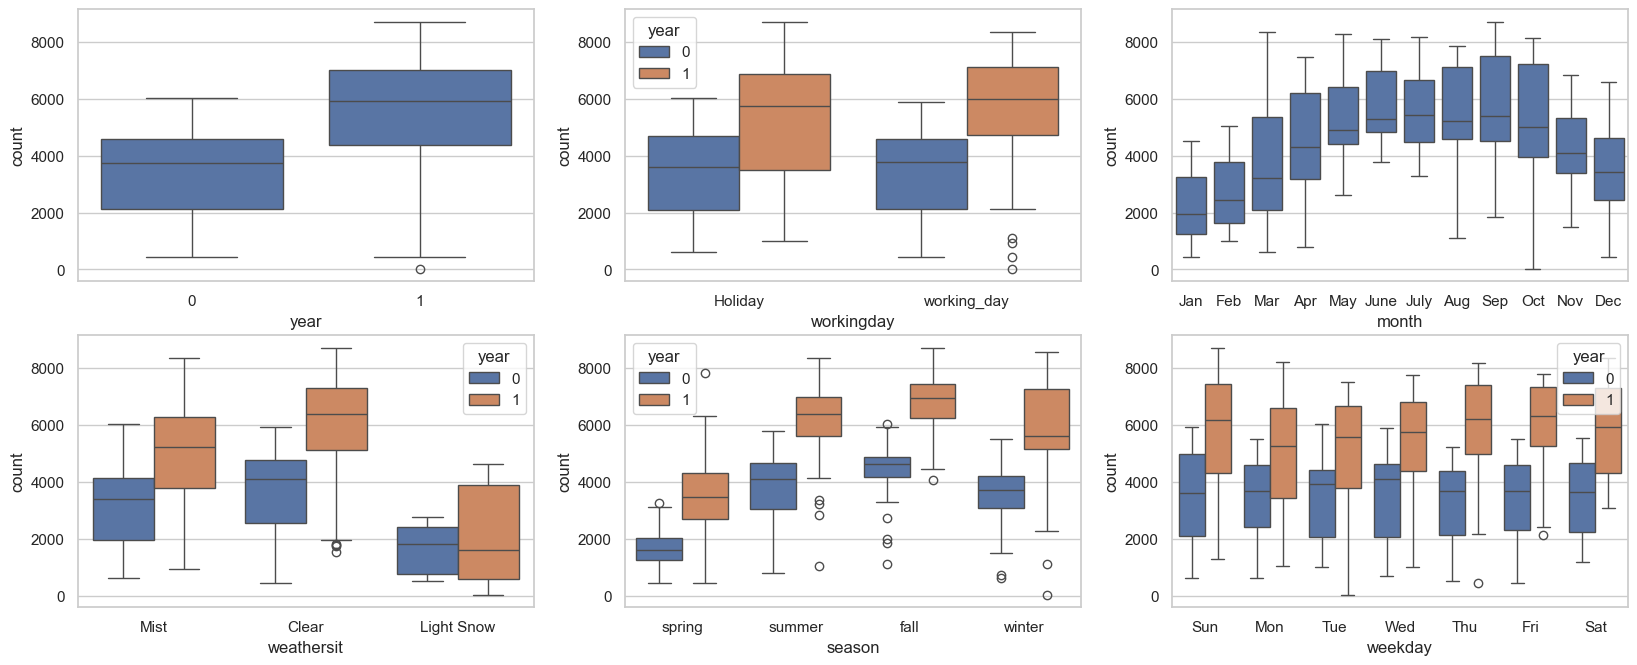

In [30]:
##Relationship between categorical and continuous variable
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'year', y = 'count' , data = boomBikes)
#plt.subplot(3,3,2)
#sns.boxplot(x = 'humidity', y = 'count', data = boomBikes)
plt.subplot(3,3,2)
sns.boxplot(x = 'workingday', y = 'count',hue='year', data = boomBikes)
plt.subplot(3,3,3)
sns.boxplot(x = 'month', y = 'count', data = boomBikes)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'count', hue='year', data = boomBikes)
plt.subplot(3,3,5)
sns.boxplot(x = 'season', y = 'count', hue='year', data = boomBikes)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'count', hue='year', data = boomBikes)
plt.show()

1. Bike Rentals are more during the Fall season and then in summer
2. Bike Rentals are more in the year 2019 compared to 2018
3. Bike Rentals are more in partly cloudy weather
4. Bike Rentals are more on Saturday,wednesday and thursday

### Let's Check Numeric Variables. 

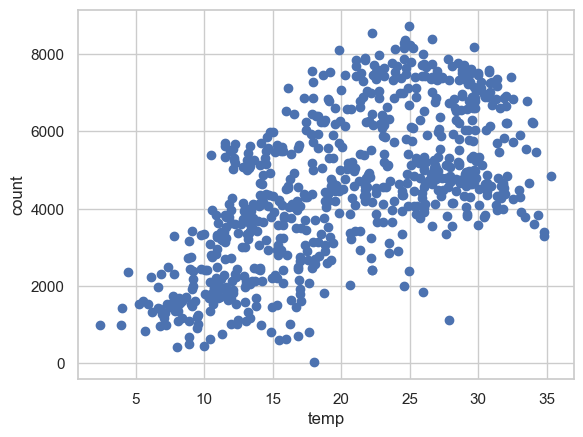

In [31]:
#Temperature Continous Variables.
plt.scatter('temp','count',data=boomBikes)
plt.xlabel('temp')
plt.ylabel('count')
plt.show()

As the temperature increased we can see increase growth in count. 

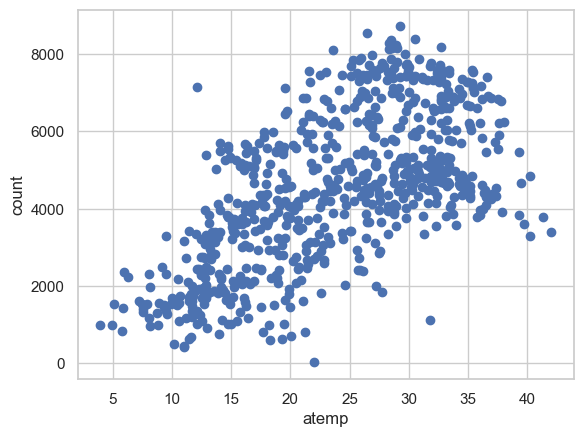

In [32]:
#Let's check similar atemp 
plt.scatter('atemp','count',data=boomBikes)
plt.xlabel('atemp')
plt.ylabel('count')
plt.show()

In [33]:
boomBikes.head(2)

,season,year,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,month
0,spring,0,Sun,Holiday,Mist,14.110847,18.18125,80.5833,10.749882,985,Jan
1,spring,0,Mon,Holiday,Mist,14.902598,17.68695,69.6087,16.652113,801,Jan


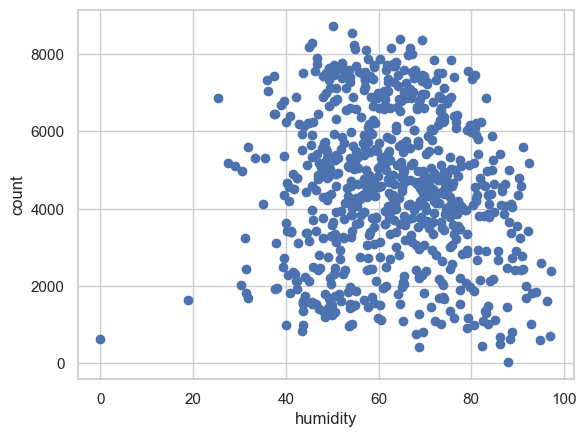

In [34]:
#Checking Humidity Count.
plt.scatter('humidity','count',data=boomBikes)
plt.xlabel('humidity')
plt.ylabel('count')
plt.show()

As the humidity increase the bike rentals is Increased. 

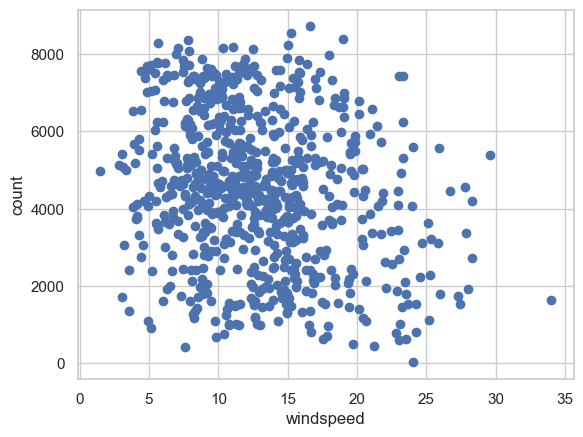

In [35]:
#Windspeed check 
plt.scatter('windspeed','count',data=boomBikes)
plt.xlabel('windspeed')
plt.ylabel('count')
plt.show()

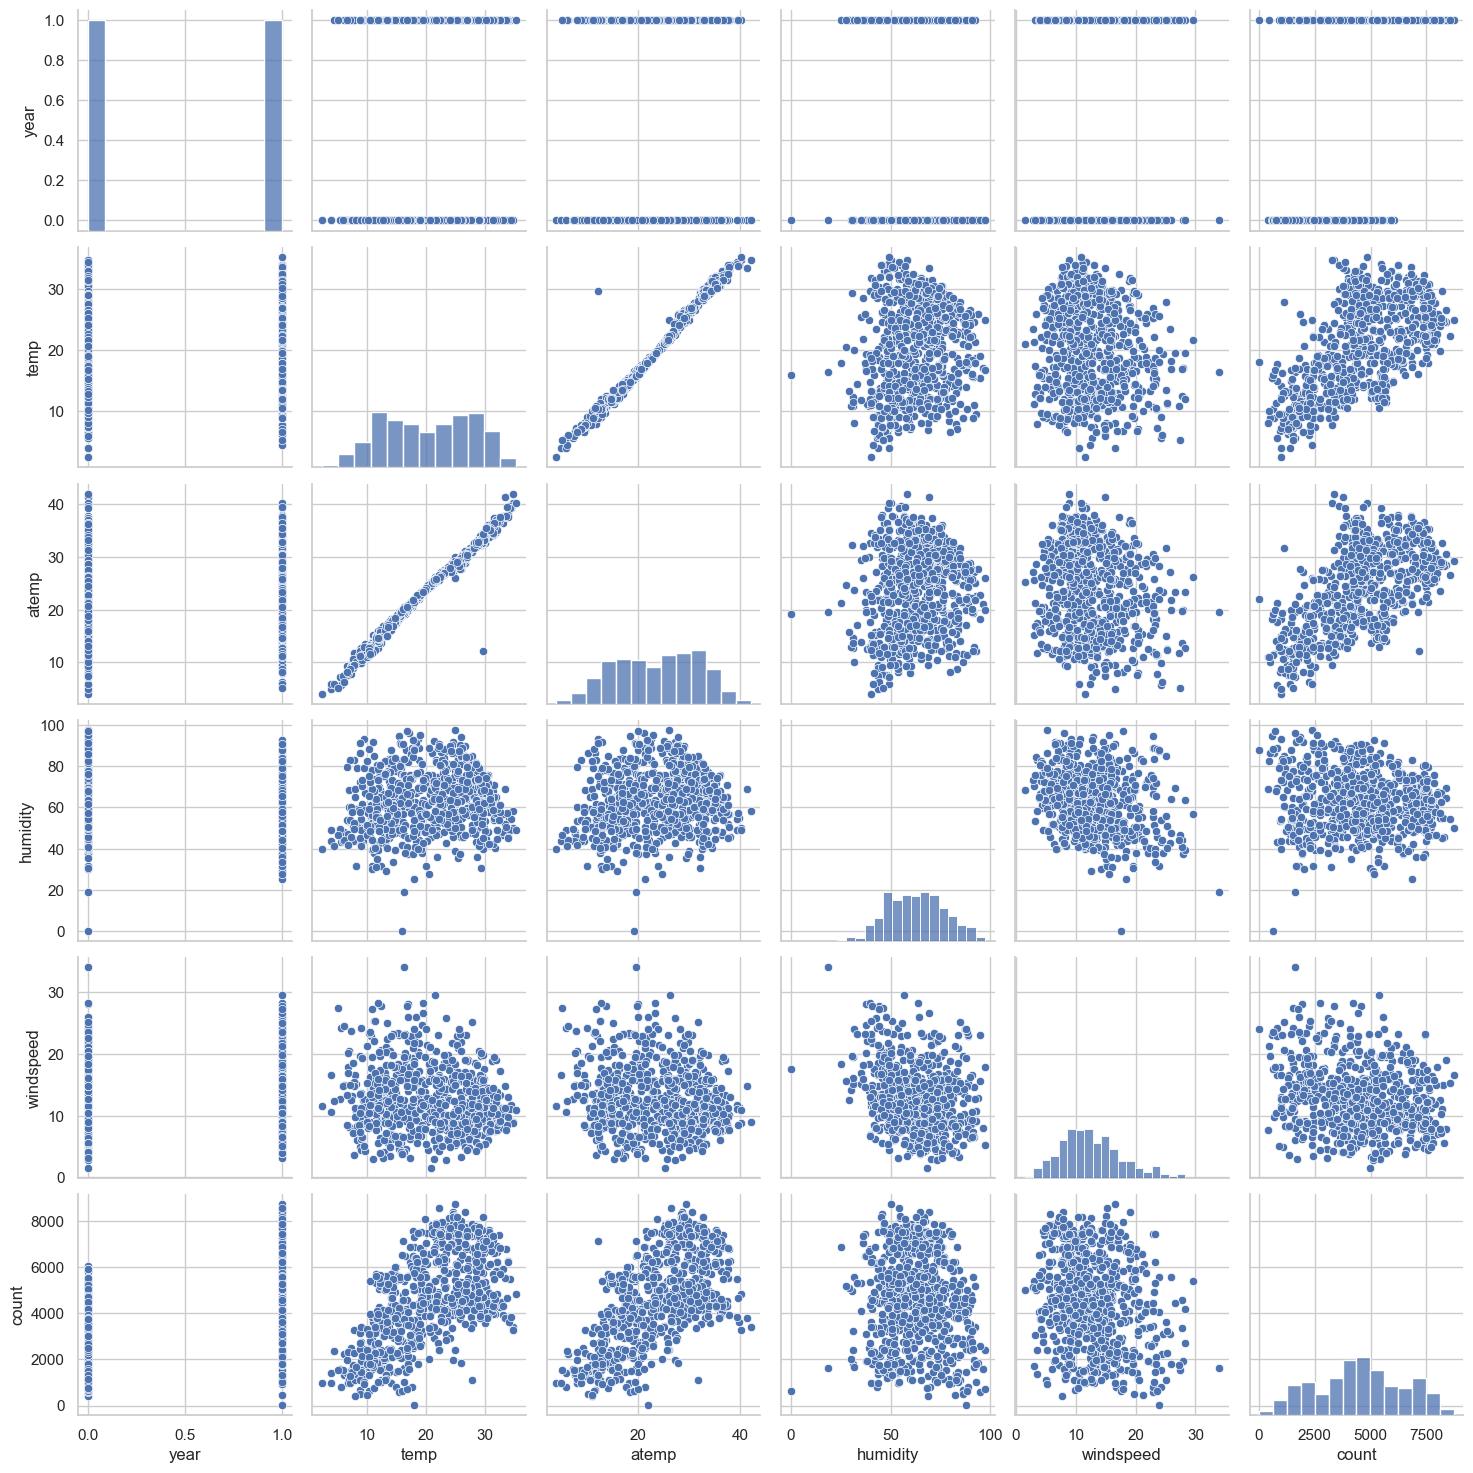

In [36]:
#Let's check the comparision of numeric variables
sns.pairplot(boomBikes)


We can clearly See Temp and atemp are highly same correlated form the graph above. 
Count across windspeed are available, no matter what's windspeed count has increased. 
As the temperature increased count got increased. 


### Multivariate Analaysis

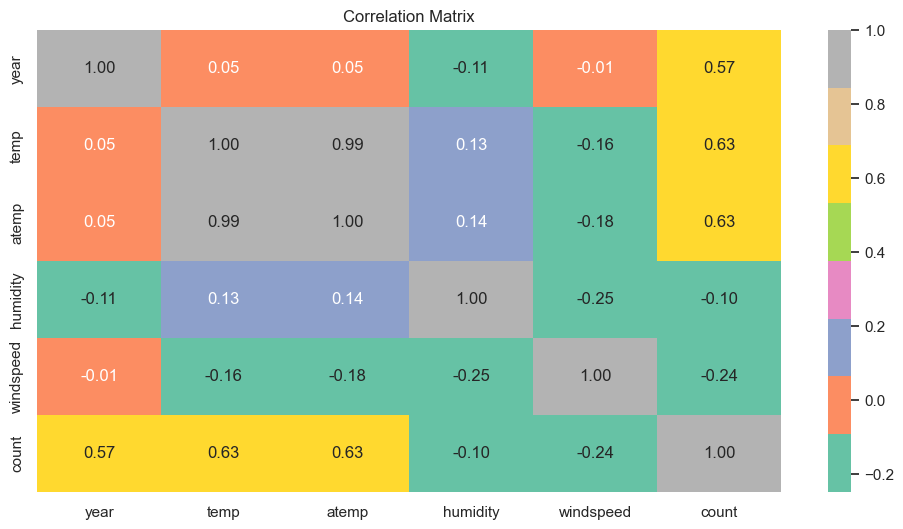

In [37]:
#Let's check correlation graph to understand this. 
numerical_cols = boomBikes.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_cols.corr(), annot=True,fmt=".2f",cmap='Set2')
plt.title("Correlation Matrix")
plt.show()

Temp and atemp are highly correlated, One of them can be dropped. 
Windspeed and humidity are highly negatively correlated with count. 

In [38]:
#atemp can be dropped. - Multicolinearity 
boomBikes=boomBikes.drop(['atemp'], axis=1)

In [39]:
boomBikes.head(2)

,season,year,weekday,workingday,weathersit,temp,humidity,windspeed,count,month
0,spring,0,Sun,Holiday,Mist,14.110847,80.5833,10.749882,985,Jan
1,spring,0,Mon,Holiday,Mist,14.902598,69.6087,16.652113,801,Jan


### Step 3: Data Preparation

In [40]:
boomBikes.workingday.value_counts()

workingday
working_day    499
Holiday        231
Name: count, dtype: int64

#### Dummy Variables

In [41]:
boomBikes['workingday']=boomBikes.workingday.map({'working_day':1, 'Holiday': 0 })

In [42]:
### 3. Let's create dummy variables. 
seasons=pd.get_dummies(boomBikes.season,drop_first=True,dtype=int)
weekdays=pd.get_dummies(boomBikes.weekday,drop_first=True,dtype=int)
weather_sit=pd.get_dummies(boomBikes.weathersit,drop_first=True,dtype=int)
months=pd.get_dummies(boomBikes.month,drop_first=True,dtype=int)

In [43]:
# Add the results to the original bike dataframe
boomBikes=pd.concat([months,weekdays,weather_sit,seasons,boomBikes],axis=1)
boomBikes.head(3)

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,season,year,weekday,workingday,weathersit,temp,humidity,windspeed,count,month
0,0,0,0,1,0,0,0,0,0,0,...,spring,0,Sun,0,Mist,14.110847,80.5833,10.749882,985,Jan
1,0,0,0,1,0,0,0,0,0,0,...,spring,0,Mon,0,Mist,14.902598,69.6087,16.652113,801,Jan
2,0,0,0,1,0,0,0,0,0,0,...,spring,0,Tue,1,Clear,8.050924,43.7273,16.636703,1349,Jan


In [44]:
# Drop 'season','month','weekday','weathersit' as we have created the dummies for it
boomBikes.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
boomBikes.head(3)

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist,spring,summer,winter,year,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,8.050924,43.7273,16.636703,1349


In [45]:
boomBikes.dtypes

Aug             int64
Dec             int64
Feb             int64
Jan             int64
July            int64
June            int64
Mar             int64
May             int64
Nov             int64
Oct             int64
Sep             int64
Mon             int64
Sat             int64
Sun             int64
Thu             int64
Tue             int64
Wed             int64
Light Snow      int64
Mist            int64
spring          int64
summer          int64
winter          int64
year            int64
workingday      int64
temp          float64
humidity      float64
windspeed     float64
count           int64
dtype: object

In [46]:
boomBikes.shape

(730, 28)

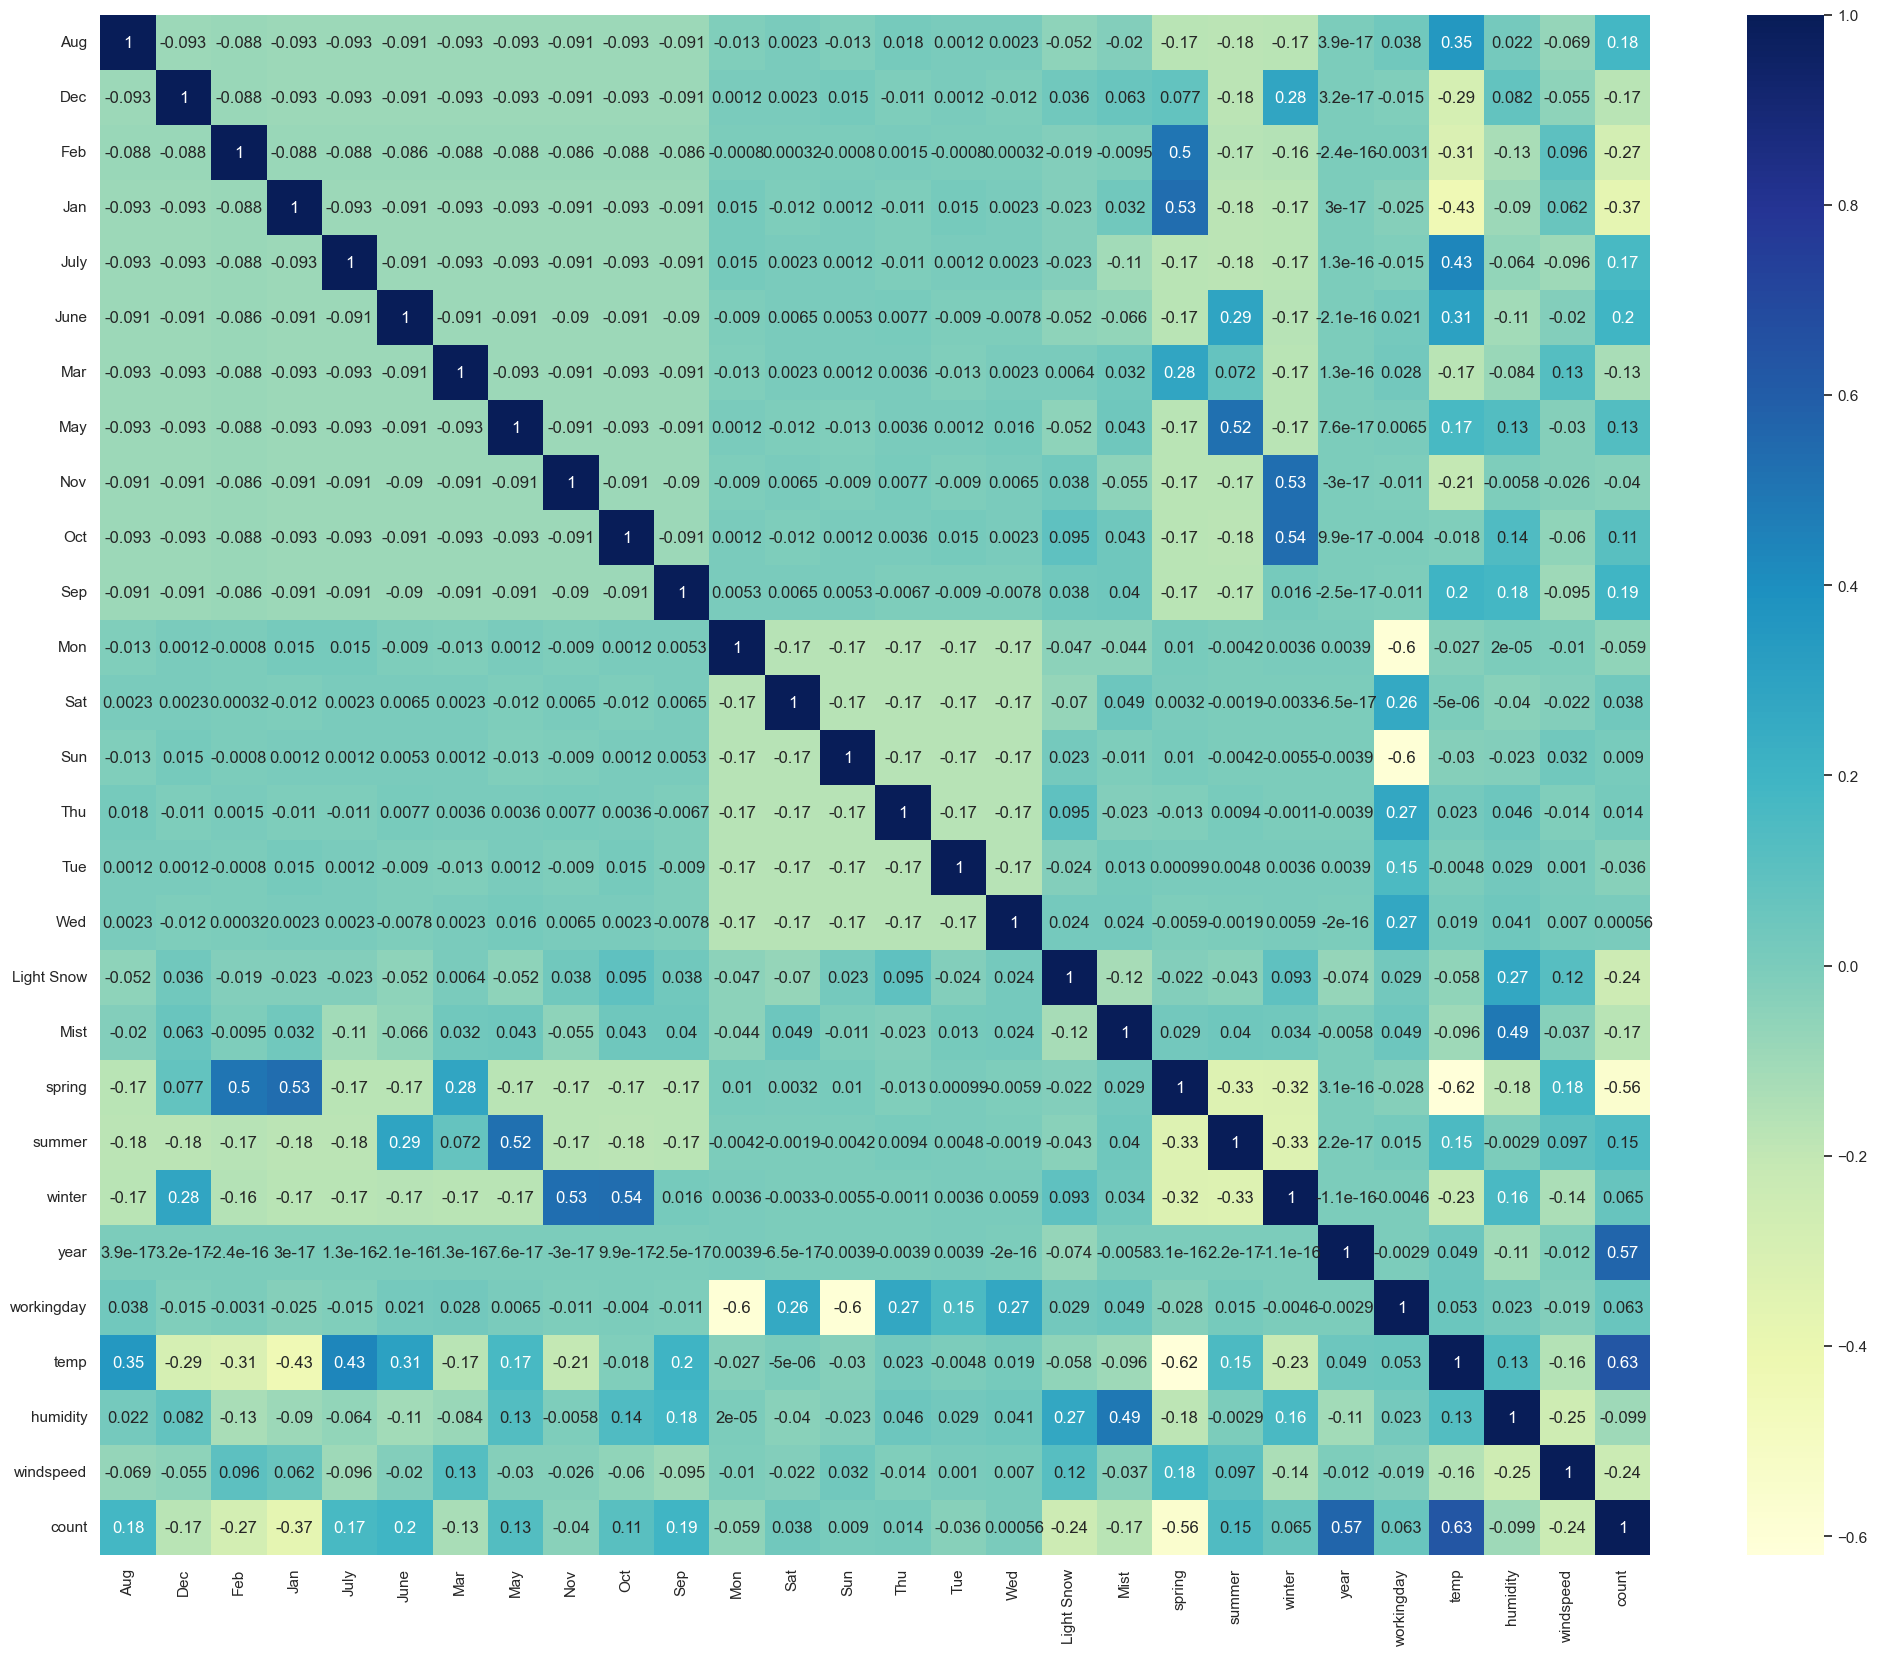

In [47]:
#Now lets check the correlation between variables again
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 20))
sns.heatmap(boomBikes.corr(), cmap='YlGnBu', annot = True)
plt.show()


1. We can see that temperature is highly correlated with count,
2. Summer season, months are in good correlation with the 'count' variable. 

### So, now Machine Learning Model building can be started. 


### Step 4: Splitting the Data into Training and Testing Sets

In [48]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
boomBikes_train, boomBikes_test = train_test_split(boomBikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [49]:
print(boomBikes_train.shape)
print(boomBikes_test.shape)

(510, 28)
(219, 28)


#### Scaling Features 

It is important to have all the variables on the same scale for the model to be easily interpretable. We can use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

There are two common ways of rescaling:

1. Min-Max scaling (Normalisation):Between 0 and 1
2. Standardisation :mean-0, sigma-1

Min-Max scaling

In [50]:
#Normalisation = (x-xmin)/(x max-x min)
#Standardisation= (x-mu)/ sigma
#import the library
from sklearn.preprocessing import MinMaxScaler

In [51]:
#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
boomBikes_train[num_vars] = scaler.fit_transform(boomBikes_train[num_vars])
boomBikes_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist,spring,summer,winter,year,workingday,temp,humidity,windspeed,count
653,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0.509887,0.575354,0.300794,0.864243
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0.395666,0.504508,0.188475,0.482973


In [52]:
#Let's check all numeric variables has maximum value 1 after scaling. 
boomBikes_train[num_vars].describe()

,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620
std,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.540519,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


All the numeric variables are now mapped between 0 and 1

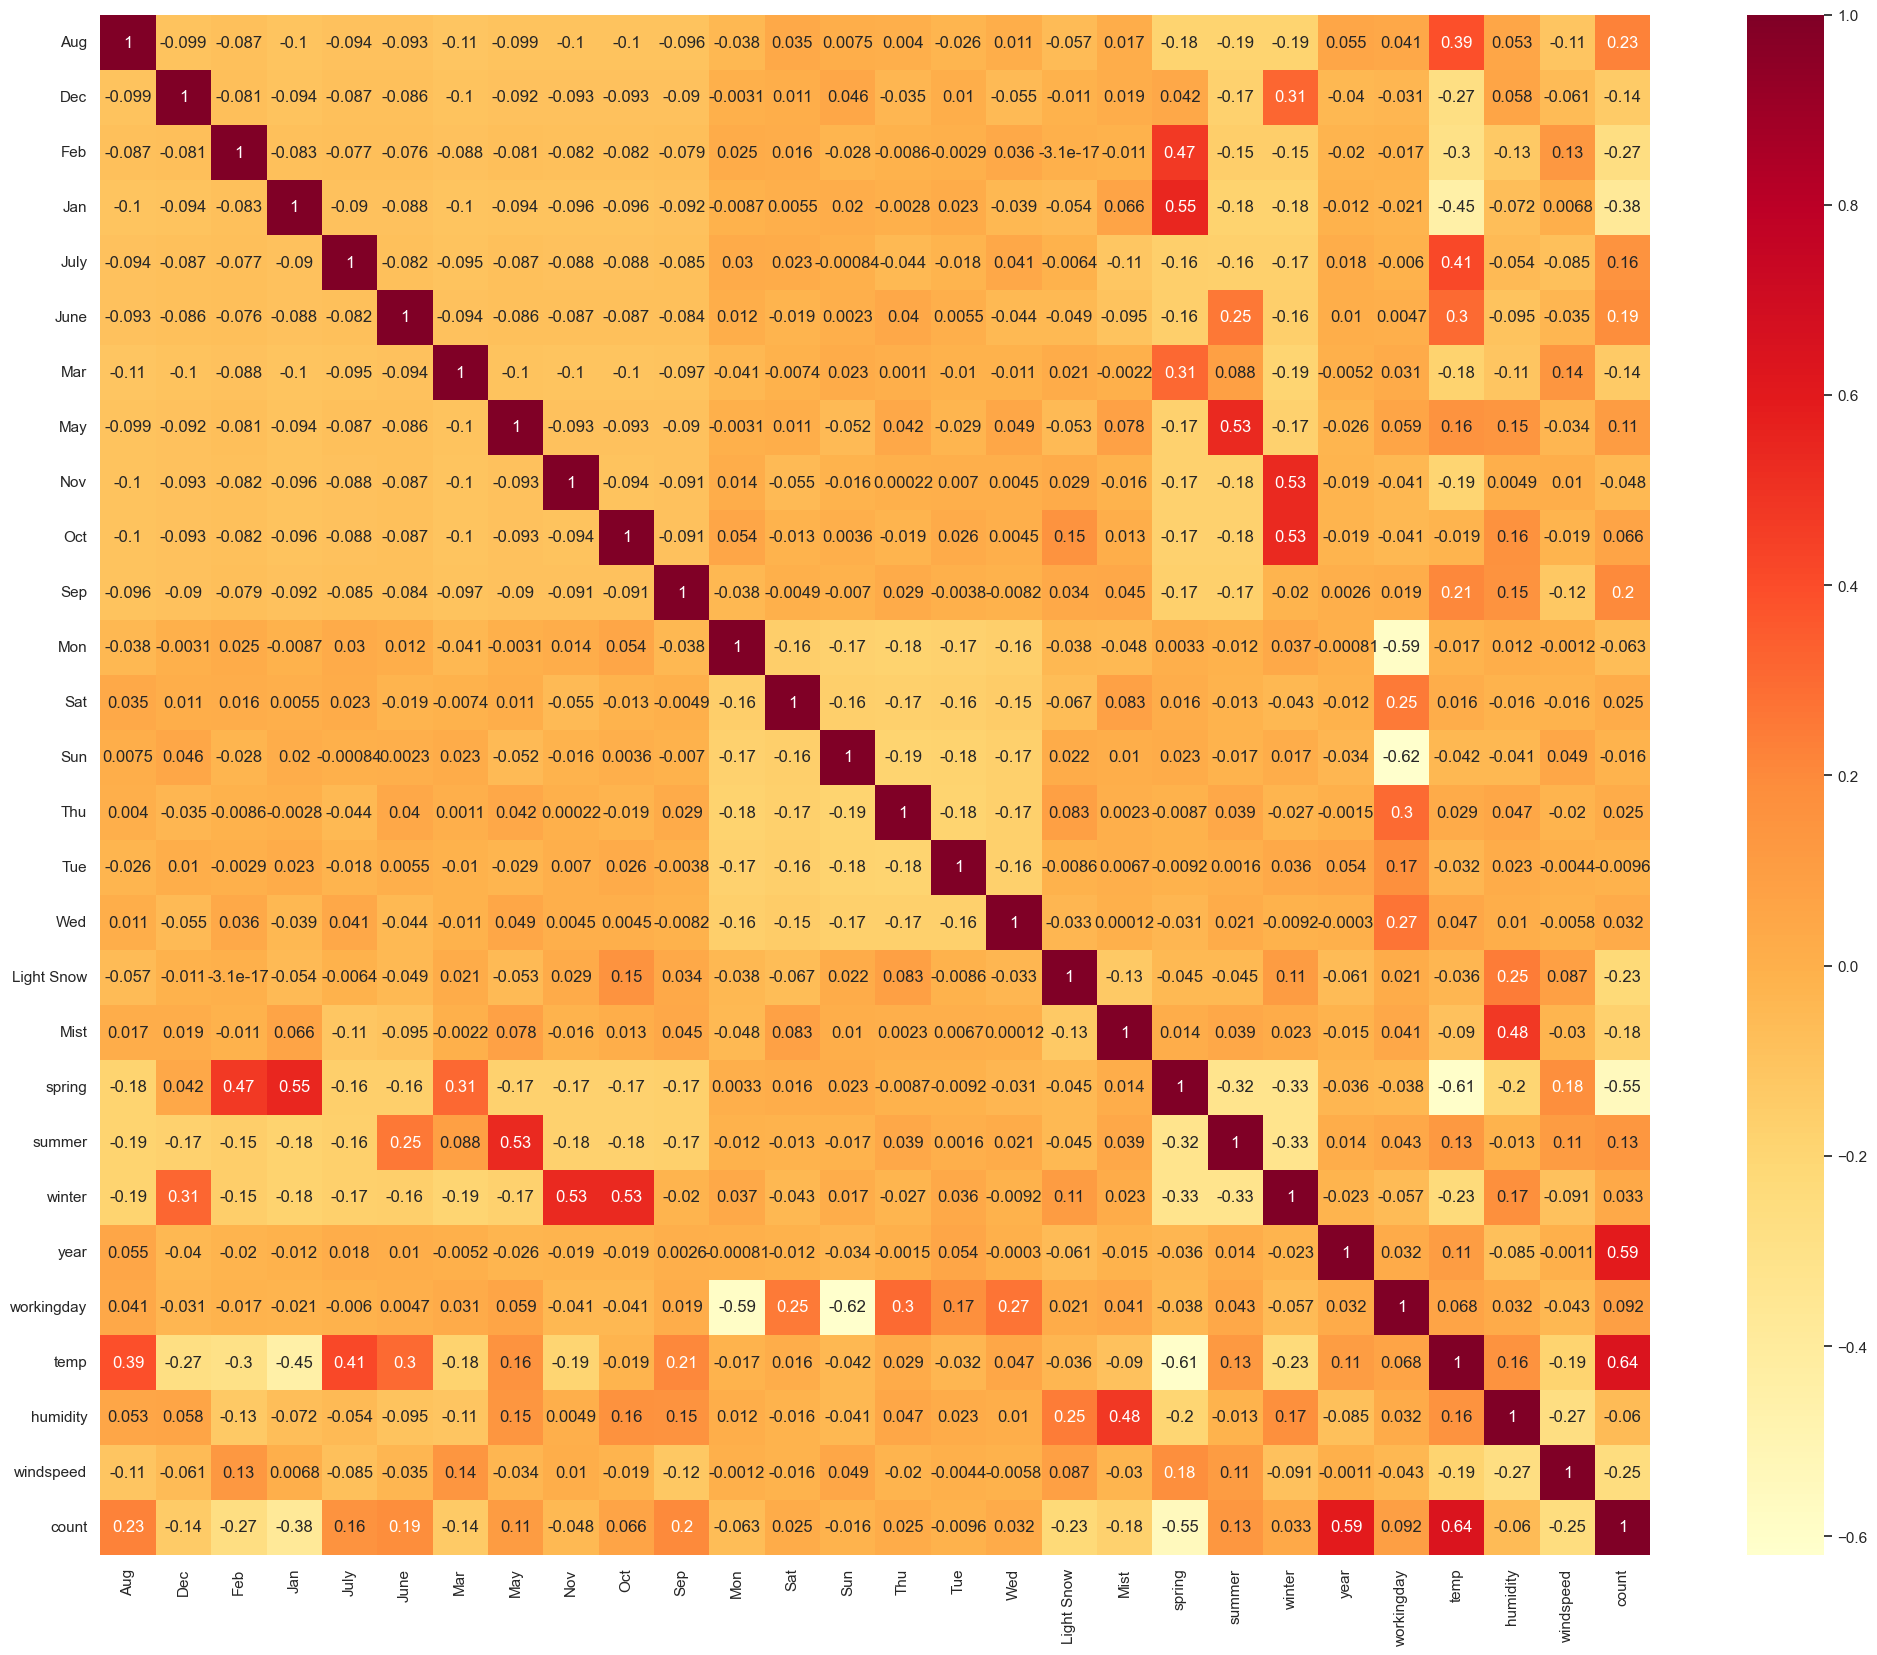

In [53]:
plt.figure(figsize=(25, 20))
sns.heatmap(boomBikes_train.corr(),cmap='YlOrRd',annot = True)
plt.show()

From the heatmap we can see temp, year are highly correlated to the 'count'. 

Multicollinearity: Assumes that predictors are not correlated with each other. If there is correlation among the predictors



Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>



The $m$ values are called the model **coefficients** or **model parameters**.

### Let's Start building X and Y for the Model 

In [54]:
#Divide the data into X and y
y_train = boomBikes_train.pop('count')
X_train = boomBikes_train

### Step 5: Building a linear regression model

##### let's use RFE - Recursive Feature Elimination 
###### Here we are going with Automated way of Feature selection

In [55]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [56]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15) 
rfe = rfe.fit(X_train, y_train)

In [57]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('Mar', False, 13),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 9),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 10),
 ('Sun', True, 1),
 ('Thu', False, 11),
 ('Tue', False, 7),
 ('Wed', False, 8),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('year', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [58]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Jan', 'July', 'Sep', 'Mon', 'Sun', 'Light Snow', 'Mist', 'spring',
       'summer', 'winter', 'year', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [59]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sat', 'Thu',
       'Tue', 'Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [60]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [61]:
# Adding a constant variable - By Default Statsmodel API doesn't add constants. 
import statsmodels.api as sm  
X_train_rfe_sm = sm.add_constant(X_train_rfe)

In [62]:
#Just Look at the const is added. 
X_train_rfe_sm.head()

,const,Jan,July,Sep,Mon,Sun,Light Snow,Mist,spring,summer,winter,year,workingday,temp,humidity,windspeed
653,1.0,0,0,0,0,0,0,0,0,0,1,1,1,0.509887,0.575354,0.300794
576,1.0,0,1,0,0,0,0,0,0,0,0,1,1,0.815169,0.725633,0.264686
426,1.0,0,0,0,0,1,0,1,1,0,0,1,0,0.442393,0.640189,0.255342
728,1.0,0,0,0,1,0,0,0,1,0,0,1,0,0.245101,0.498067,0.663106
482,1.0,0,0,0,0,1,0,1,0,1,0,1,0,0.395666,0.504508,0.188475


In [63]:
# Running the linear model , Here we have to pass X_train which is modified to add intercept. Pass the x with intercept. 
lm = sm.OLS(y_train,X_train_rfe_sm.astype(float)).fit()

OLS stands for Ordinary Least Squares, which is the method that 'statsmodels' use to fit the line. You use the command 'add_constant' so that statsmodels also fits an intercept. If you don't use this command, it will fit a line passing through the origin by default.

In [64]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          2.31e-191
Time:                        23:20:11   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1925      0.042      4.537      0.0

#### What is R Square:  1 - RSS/TSS , More the R-Square is closer to 1 best fitting line will be found. 
The strength of a linear regression model. The value of R-squared lies between 0 and 1, where 1 implies that the variance in the data is being explained by the model, and 0 implies that none of the variance values is being explained by the model. Obviously, it is very difficult to achieve either of the extreme values.

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

#### Checking VIF 

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. 

### $ VIF_i = \frac{1}{1 - {R_i}^2} $


In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
#Common function to find VIF
def calculateVarianceInFactor(X_train_new):
    # Calculate the VIFs for the new model
    vif = pd.DataFrame()
    X = X_train_new
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [67]:
# Calculate the VIFs for the new model
calculateVarianceInFactor(X_train_rfe)


,Features,VIF
13,humidity,32.81
12,temp,19.97
11,workingday,18.57
7,spring,5.04
4,Sun,4.95
14,windspeed,4.92
3,Mon,4.79
9,winter,3.76
8,summer,3.03
6,Mist,2.31


What we have learnt to perform analysis and dropping features we have 3 combinations. 

1. High P Value and High VIF Value - Remove Straight away. 
    - High P Value means less Significant, High VIF means Correlated 
2. High - Low Cases 
    - High P Value, Low VIF : Remove this first 
    - Low P Value, High VIF : Remove this later. 
3. Low P Value, LOW VIF Value - Keep this 
    - Low P means significant and Low VIF less correlated 

Jan can be dropped because P value is too high, and VIF is Low. 

In [68]:
#Drop January
X_train_new1 = X_train_rfe.drop(["Jan"], axis = 1)

In [69]:
#Rebuilding the model without 'Jan'

#Build a model
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1.astype(float)).fit()
print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          1.13e-191
Time:                        23:20:11   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1799      0.042      4.276      0.0

In [70]:
# Calculate the VIFs for the new model without Jan
calculateVarianceInFactor(X_train_new1)

,Features,VIF
12,humidity,32.14
11,temp,18.98
10,workingday,18.41
3,Sun,4.91
13,windspeed,4.90
6,spring,4.80
2,Mon,4.76
8,winter,3.71
7,summer,3.03
5,Mist,2.31


`humidity` variable can be dropped due to High VIF 

In [71]:
#Drop humidity
X_train_new2 = X_train_new1.drop(["humidity"], axis = 1)

In [72]:
#Build a model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2.astype(float)).fit()
print(lm2.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          5.73e-189
Time:                        23:20:12   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1005      0.038      2.618      0.0

In [73]:
#Now, Let's check VIF
calculateVarianceInFactor(X_train_new2)

,Features,VIF
10,workingday,16.19
11,temp,12.73
12,windspeed,4.75
3,Sun,4.45
2,Mon,4.21
6,spring,3.82
8,winter,2.80
7,summer,2.75
9,year,2.07
0,July,1.60


`Mon` has high P value and it can be dropped

In [74]:
#Drop Spring
X_train_new3 = X_train_new2.drop(["Mon"], axis = 1)

In [75]:
#Build a model
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3.astype(float)).fit()
print(lm3.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          3.28e-189
Time:                        23:20:12   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1493      0.031      4.886      0.0

In [76]:
#Now, Let's check VIF
calculateVarianceInFactor(X_train_new3)

,Features,VIF
10,temp,6.73
9,workingday,4.65
11,windspeed,4.64
5,spring,2.38
6,summer,2.31
8,year,2.07
7,winter,1.92
2,Sun,1.83
0,July,1.58
4,Mist,1.56


`July` has high P value and it can be dropped. 

In [77]:
#Drop July
X_train_new4 = X_train_new3.drop(["July"], axis = 1)

In [78]:
#Build a model
X_train_lm4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(y_train,X_train_lm4.astype(float)).fit()
print(lm4.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.4
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          6.86e-189
Time:                        23:20:12   Log-Likelihood:                 502.83
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     498   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1405      0.031      4.599      0.0

In [79]:
#Now, Let's check VIF
calculateVarianceInFactor(X_train_new4)

,Features,VIF
9,temp,5.48
8,workingday,4.65
10,windspeed,4.63
4,spring,2.30
7,year,2.07
5,summer,1.99
1,Sun,1.83
6,winter,1.77
3,Mist,1.56
0,Sep,1.23


`spring` has high P Value. 

In [80]:
#Drop humidity
X_train_new5 = X_train_new4.drop(["spring"], axis = 1)

In [81]:
#Build a model
X_train_lm5 = sm.add_constant(X_train_new5)
lm5 = sm.OLS(y_train,X_train_lm5.astype(float)).fit()
print(lm5.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          1.47e-188
Time:                        23:20:12   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0753      0.019      4.051      0.0

In [82]:
#Now, Let's check VIF
calculateVarianceInFactor(X_train_new5)

,Features,VIF
8,temp,4.76
7,workingday,4.04
9,windspeed,3.43
6,year,2.02
1,Sun,1.69
4,summer,1.57
3,Mist,1.53
5,winter,1.40
0,Sep,1.20
2,Light Snow,1.08


The p values represent the significance of the variables and VIF which represent how variables are correlated to each other. Based on these two parameters we decided which variable to drop.

The VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.


### Let's Summarise the analysis:

##### 1. The p-value for each term tests the null hypothesis that the coefficient is zero (indicating no effect). A low p-value (less than 0.05) suggests that you can reject the null hypothesis.

##### 2. A common rule of thumb is that a VIF greater than 10 indicates high multicollinearity. In our case, with VIF values below 5, we are in good shape and can proceed with our regression.

##### 3. R-squared measures the strength of the relationship between your model and the dependent variable on a scale from 0 to 100%. Our R-squared value is 0.836, or 83.6%.

##### 4. The adjusted R-squared adjusts for the number of terms in the model. Our adjusted R-squared is approximately 0.83, or 83%.

Let's try to cross check by dropping any one variable now and see the impact. 

In [83]:
#Drop the temperature 
X_train_new6 = X_train_new5.drop(["temp"], axis = 1)

In [84]:
#Build a model
X_train_lm6 = sm.add_constant(X_train_new6)
lm6 = sm.OLS(y_train,X_train_lm6.astype(float)).fit()
print(lm6.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     76.68
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           2.30e-88
Time:                        23:20:12   Log-Likelihood:                 259.65
No. Observations:                 510   AIC:                            -499.3
Df Residuals:                     500   BIC:                            -456.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4045      0.023     17.615      0.0

In [85]:
#Now, Let's check VIF
calculateVarianceInFactor(X_train_new6)

,Features,VIF
8,windspeed,3.25
7,workingday,3.14
6,year,1.88
3,Mist,1.53
1,Sun,1.52
4,summer,1.50
5,winter,1.40
0,Sep,1.11
2,Light Snow,1.08


#### We can clearly see R square is dropped signigicantly and this model is not clearly not right. 

So, Model created above lm5 is clearly the right model for us. 
We have removed columns from RFE Support Columns :
   - Jan
   - Mon 
   - spring
   - July 
   - humidity  

In [86]:
#Let's check the coefficients. 
lm5.params

const         0.075325
Sep           0.097236
Sun           0.067688
Light Snow   -0.288021
Mist         -0.081347
summer        0.087429
winter        0.131826
year          0.233056
workingday    0.056323
temp          0.549936
windspeed    -0.155238
dtype: float64


We can see that the equation of our best fitted line is:

$ count = 0.075 + 0.097  \times  Sep + 0.0677  \times  Sun - 0.288 \times Light Snow - 0.081 \times Mist + 0.0874 \times summer + 0.132 \times winter + 0.233 \times year + 0.056 \times workingday + 0.55 \times windspeed $

-------

### From the lm5 model summary, it is evident that all our coefficients are not equal to zero, which means we REJECT the NULL HYPOTHESIS

### Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [87]:
y_train_count = lm5.predict(X_train_lm5)

Text(0.5, 0, 'Errors')

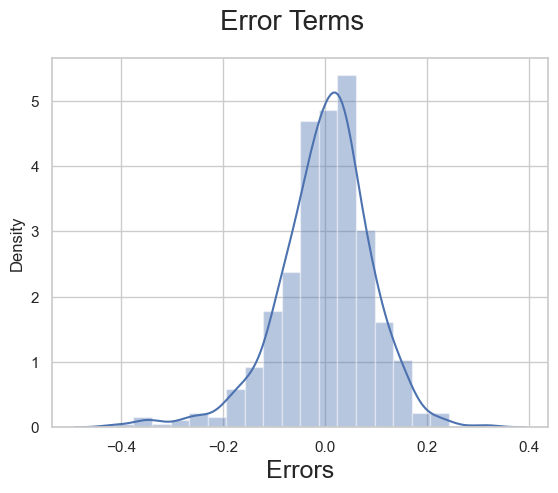

In [88]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. Fifth model.

#### Applying the scaling on the test sets

In [89]:
#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
boomBikes_test[num_vars] = scaler.transform(boomBikes_test[num_vars])
boomBikes_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist,spring,summer,winter,year,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,1,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0.817246,0.314298,0.537414,0.569029


#### Here, I made mistake by using transform_fit earlier. I required to use transform only. 

In [90]:
boomBikes_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist,spring,summer,winter,year,workingday,temp,humidity,windspeed,count
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,...,0.319635,0.255708,0.264840,0.232877,0.479452,0.698630,0.558941,0.638508,0.313350,0.520592
std,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,...,0.467403,0.437258,0.442259,0.423633,0.500722,0.459904,0.233698,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.759096,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


#### Dividing into X_test and y_test

In [91]:
y_test = boomBikes_test.pop('count')
X_test = boomBikes_test

In [92]:
#What are the columns we had in Training ? 
X_train_new5.columns

Index(['Sep', 'Sun', 'Light Snow', 'Mist', 'summer', 'winter', 'year',
       'workingday', 'temp', 'windspeed'],
      dtype='object')

In [93]:
#Let's keep exactly same columns in test data set. 
X_test_new = boomBikes_test[X_train_new5.columns]

In [94]:
# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Sep,Sun,Light Snow,Mist,summer,winter,year,workingday,temp,windspeed
184,1.0,0,0,0,1,0,0,0,0,0.831783,0.084219
535,1.0,0,0,0,0,1,0,1,1,0.901354,0.153728
299,1.0,0,0,0,1,0,1,0,1,0.511964,0.334206
221,1.0,0,0,0,0,0,0,0,1,0.881625,0.339570
152,1.0,0,0,0,0,1,0,0,1,0.817246,0.537414


In [95]:
# Making predictions
y_pred = lm5.predict(X_test_new1)

#### Finding R-squared and Adjusted R-Squared for Test set


In [96]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7955844377237248

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.


Text(0, 0.5, 'y_pred')

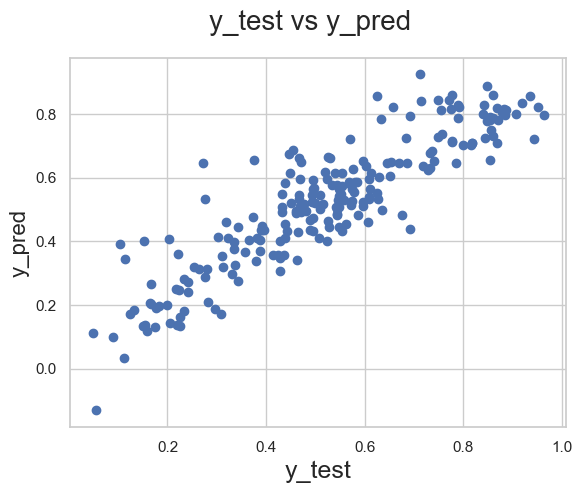

In [97]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

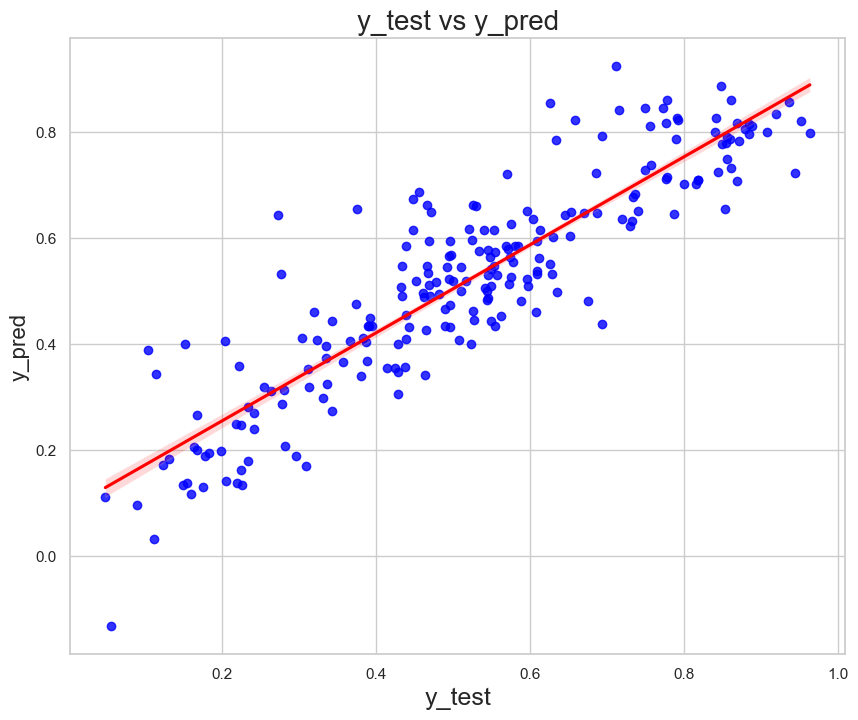

In [98]:
y_test = pd.to_numeric(y_test, errors='coerce')
y_pred = pd.to_numeric(y_pred, errors='coerce')


#Regression plot
plt.figure(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

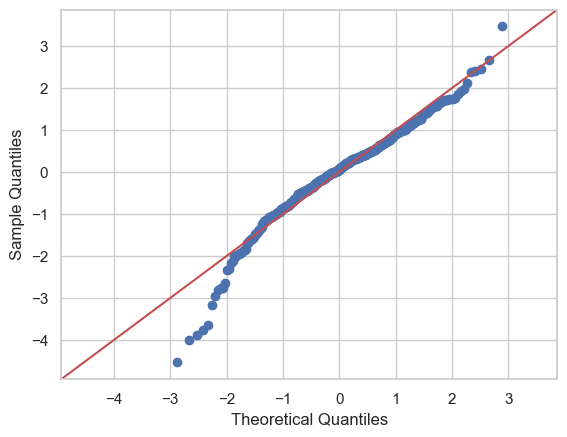

In [99]:
# Plot the qq-plot of the error terms
sm.qqplot((y_train - y_train_count), fit=True, line='45')
plt.show()

Most of the data points are on straight line means error terms are normally distributed. 

### Conclusions: 

##### The top 5 variables that are seen effecting and benefitting the Bike Rental count are as follows:

1. Temperature : 0.549936
2. Year : 0.233056
3. Light Snow : -0.288021
4. Windspeed : -0.155238
5. winter : 0.131826


We also see there are some variables with negative coefficients, A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease. 


As high temperature and good weather positively impacts bike rentals, it is recommended that bike availability and promotions to be increased during summer months to further increase bike rentals.



#### Recommendations 
 
- A US bike-sharing provider BoomBikes can focus more on Temperature. 

- We can see demand for bikes was more in 2019 than 2018, so just focus as there is increase in 2019 and might be facing dips in their revenues due to the ongoing Corona pandemic and by the time it reduces the things will be better

- Can focus more on Summer & Winter season, August, September month, Weekends, Working days as they have good influence on bike rentals.

- The company should focus on the months of January, July, September, November, and December, as they experience higher demand compared to other months.

- Additionally, demand tends to increase with rising temperatures, so monitoring weather conditions is crucial.

- During the winter season, demand also surges, so the company should be well-prepared to meet this high demand.

-------- END OF BOOK --------